## **CS146 Assignment 4**
#### **Model Description**
We consider the eczema medical trial data set: **Only the control group**

|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |


**Model 1: All studies have the same probability of success.**

* For each group in the control group, all 6 studies have the same fixed, but unknown, probability of success, $\theta_c\in[0,1]$.
* The data follow a binomial distribution in each study, conditioned on the probability of success — $\theta_c$ for control.
* The priors over $\theta_c$ are uniform.

These assumptions lead to the following model.

* Likelihood: $\prod_{i=1}^6 \text{Binomial}(s_i\,|\,\theta, n_i)$, where $s_i$ is the number of successful recoveries, $f_i$ is the number of failures (did not recover), and $n_i=s_i+f_i$ the number of patients.

* Prior: $\text{Beta}(\theta_c\,|\,1,1)$

* Posterior for control group: $\text{Beta}(\theta_c\,|\,58, 65)$.

Because:
* $\alpha_1 = \alpha_0 + \#success = 1 + 57 = 58$
* $\beta_1 = \beta_0 + \#failure = 1 + (121-57) = 1 + 64 = 65$

We generate 10000 values from the posterior: $\text{Beta}(\theta_c\,|\,58,65)$.

For each value $\theta_c$, we conduct 6 sample experiment and record the success rate of experiment:
* $\text{Binomial}(s_i\,|\,\theta_c, n_i)$ with $i = 1, ...,6$ and $n = [15,18,10,39,29,10]$. For each $s_i$, calculate the success rate by dividing by the corresponding $n_i: p_i = \frac{s_i}{n_i}$

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

data_c = np.array([[9,11,4,21,12,0],
                   [6,7,6,18,17,10]])

In [0]:
# prior
alpha0 = 1
beta0 = 1

# posterior
alpha1 = alpha0 + np.sum(data_c[0])
beta1 = beta0 + np.sum(data_c[1])

# number of patients of each experiment of the real data
num_patient = data_c[0] + data_c[1]
# success rate of the real data
real_success_rate = data_c[0]/num_patient


# generate 10000 samples θc
posterior = stats.beta.rvs(alpha1, beta1, size = 20000)

#### **Test statistics**

Our test statistic is the minimum of the resulted success rate. 

The reason is that: we suspect the data has the outlier at 0: because experiment 6 (Silny 2006) has the success rate = 0, which seems to be unlikely and acts as an outlier (when we graph the histogram of these 6 experiment). Hence, we chose the minimum to signify this point: to show that our model failed to represent this point. 

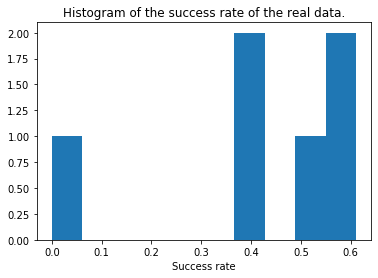

In [3]:
# plot the histogram of the data to examine the characteristics
plt.hist(real_success_rate)
plt.xlabel("Success rate")
plt.title("Histogram of the success rate of the real data.")
plt.show()

In [0]:
# test_stats function is our test statistics: returning the minimum of the data
def test_stats(data):
  return min(data)

In [0]:
# list to store the test statistics results
test_results = []
# calculate the test statistics for each value of θc by looping through the values for θc
for p in posterior:
  result = []
  # for each value θc, we canduct 6 experiments
  for trial in range(6):
    # number of success for each experiment
    num_success = stats.binom.rvs(num_patient[trial], p)
    
    # success rate of each experiment
    cur_success_rate = num_success/num_patient[trial]
    
    # the result of 6 experiments
    result.append(cur_success_rate)
  
  # the results of 20 000 samples
  test_results.append(test_stats(result))

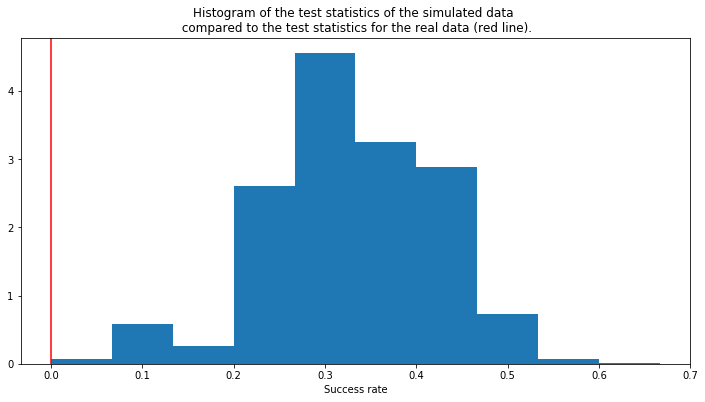

percentage result > real statistic value:  99.58 %
p value:  0.0041999999999999815


In [6]:
# the benchmark: the test statistics for the real data
benchmark = test_stats(real_success_rate)

plt.figure(figsize = (12, 6))
# plot the histogram of the test statistics of the simulated data
plt.hist(test_results, density = True)
plt.axvline(benchmark, color='red')
plt.xlabel("Success rate")
plt.title("Histogram of the test statistics of the simulated data \n compared to\
 the test statistics for the real data (red line).")
plt.show()

final = np.mean(np.array(test_results) > benchmark)
print("percentage result > real statistic value: ", final*100, "%")
print("p value: ", 1-final)

#### **Conclusion**

As we can see, the p value is 0.0042, which is smaller than 0.05, meaning that the model failed to represent the data with respect to this test statistic (the minimum of the data). 

We can conclude that the model fail to sufficiently represent the data with respect to this test statistic: the minimum of the data. This indicates that the model possibly fails to represent the outlier in the data on the far left of the histogram (success rate = 0). 